# SQL Task 

In [1]:
# Importing the required libraries

import sqlite3
import pandas as pd

In [2]:
# Read the code below and write your observation in the next cell

conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

cursor.execute("PRAGMA table_info('Salaries')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

[('Salaries',)]
Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


### Read the code above. Write observations here, i.e. what the code is trying to do..
- First code describes that we are connecting to the database named `database.sqlite`.
- later we are reading the table `Salaries` from the database.

In [3]:
# Reading the data from database and storing it in the dataframe

df = pd.read_sql_query("""SELECT * FROM Salaries""", conn)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [4]:
len(df["Benefits"][df["Benefits"]== 'Not Provided'])

4

## Q_sample: Who is getting the maximum salary?

In [5]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT MAX(TotalPay) FROM Salaries""", conn)
output

,MAX(TotalPay)
0,567595.43


In [6]:
# Pandas Implementation - 1

max(df.TotalPay)

567595.43

In [7]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.TotalPay == max(df.TotalPay), ['TotalPay']]

,TotalPay
0,567595.43


<h3>
If you observe the above output, it is giving the maximum salary. 

Inorder to understand who is getting the maximum salary look at the next cell. 

Also try to map Pandas .loc syntax with the SQL SELECT Query.
</h3>

In [8]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT * 
                            FROM Salaries 
                            WHERE TotalPay = (SELECT MAX(TotalPay) FROM Salaries)""", conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,


In [9]:
# Pandas Implementation

df.loc[df.TotalPay == max(df.TotalPay)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,


## Now try and answer below mentioned questions using SQL and equivalent Pandas Queries:

1. Retrieve the top 8 rows from the table.
2. What is the average TotalPay?
3. What is the highest amount of BasePay in the dataset?
4. What is the Job title of 'NATHANIEL FORD'?
5. How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?
6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)
7. How many unique jobs are there?
8. What are the top 5 most common jobs?
9. How many people have the word Chief in their job title?



Reference - https://www.sqlitetutorial.net

## 1.Retrieve the top 8 rows from the table.

In [10]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT * FROM Salaries LIMIT 8""", conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [11]:
# Pandas Implementation - 1

df.head(8)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


In [12]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[:7,:]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


## 2.What is the average TotalPay?

In [13]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries""", conn)
output

,AVG(TotalPay)
0,74768.321972


In [14]:
# Pandas Implementation - 1

df["TotalPay"].mean()

74768.321971703

In [15]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

#df.loc[df.TotalPay == df.TotalPay.mean(), ["TotalPay"]]
df.loc[:,"TotalPay"].mean()

74768.321971703

## 3. What is the highest amount of BasePay in the dataset?


In [16]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT MAX(BasePay) FROM Salaries WHERE (BasePay != 'Not Provided' AND BasePay != '')""", conn)
output

,MAX(BasePay)
0,319275.01


In [17]:
# Pandas Implementation
import numpy as np

df["BasePay"] = df["BasePay"].replace({'Not Provided': np.nan})


In [18]:
df["BasePay"].unique()

array([167411.18, 155966.02, 212739.13, ..., 6.04, 15.5, nan],
      dtype=object)

In [19]:
df["BasePay"] = pd.to_numeric(df["BasePay"])

In [20]:
df["BasePay"].max()

319275.01

In [21]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.BasePay == max(df.BasePay), ['BasePay']]


,BasePay
72925,319275.01


## 4. What is the Job title of 'NATHANIEL FORD'?


In [22]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT JobTitle FROM Salaries WHERE EmployeeName == 'NATHANIEL FORD'""", conn)
output

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [23]:
# Pandas Implementation

df_new = df[df["EmployeeName"] == "NATHANIEL FORD"]
print(df_new["JobTitle"])

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object


In [24]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.EmployeeName == "NATHANIEL FORD", ['JobTitle']]


,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


## 5. How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?


In [25]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT TotalPayBenefits FROM Salaries WHERE EmployeeName == 'NATHANIEL FORD'""", conn)
output

,TotalPayBenefits
0,567595.43


In [26]:
# Pandas Implementation

df_new = df[df["EmployeeName"] == "NATHANIEL FORD"]
print(df_new["TotalPayBenefits"])

0    567595.43
Name: TotalPayBenefits, dtype: float64


In [27]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.EmployeeName == "NATHANIEL FORD", ['TotalPayBenefits']]


,TotalPayBenefits
0,567595.43


## 6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)


In [28]:
df["Year"].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [29]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT AVG(TotalPay), Year FROM Salaries GROUP BY Year""", conn)
output

,AVG(TotalPay),Year
0,71744.103871,2011
1,74113.262265,2012
2,77611.443142,2013
3,75463.918140,2014


In [30]:
# Pandas Implementation

df.groupby('Year')["TotalPay"].mean()

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

## 7. How many unique jobs are there?


In [31]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT COUNT(DISTINCT JobTitle) FROM Salaries""", conn)
output

,COUNT(DISTINCT JobTitle)
0,2159


In [32]:
# Pandas Implementation - 1

df["JobTitle"].nunique()

2159

In [33]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[:,'JobTitle'].nunique()


2159

## 8. What are the top 5 most common jobs?


In [34]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT JobTitle, COUNT() FROM Salaries GROUP BY JobTitle ORDER BY COUNT(JobTitle) DESC LIMIT 5""", conn)
output

,JobTitle,COUNT()
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


In [35]:
# Pandas Implementation - 1

df['JobTitle'].value_counts()[0:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [36]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.JobTitle.value_counts(),'JobTitle'][0:5]


7036                           UTILITY SPECIALIST
4389    AUTOMOTIVE MACHINIST ASSISTANT SUPERVISOR
3736                                SPECIAL NURSE
2518                                  FIREFIGHTER
2421             SERGEANT III (POLICE DEPARTMENT)
Name: JobTitle, dtype: object

## 9. How many people have the word Chief in their job title?


In [37]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT COUNT(JobTitle) FROM Salaries WHERE JobTitle LIKE ('%Chief%')""", conn)
output

,COUNT(JobTitle)
0,627


In [38]:
# Pandas Implementation - 1

count = 0
for i in df['JobTitle']:
    if 'Chief' in i or 'CHIEF' in i:
        count+=1
print(count)

627


# Exploratory Data Analysis

In [39]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [40]:
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
import numpy as np

In [44]:
df = df.replace({'Not provided': np.nan} and {'':np.nan})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148652 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 12.5+ MB


In [46]:
df = df.replace({'Not Provided' : np.nan})

In [47]:
df['OvertimePay'].unique()

array([0.0000000e+00, 2.4513188e+05, 1.0608818e+05, ..., 1.0270000e+02,
       5.6770000e+01,           nan])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148652 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 12.5+ MB


## Handling Missing Values

In [50]:
df.isnull().sum()

Id                       0
EmployeeName             2
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [51]:
round((df.isnull().sum()/len(df))*100,3)

Id                    0.000
EmployeeName          0.001
JobTitle              0.000
BasePay               0.410
OvertimePay           0.003
OtherPay              0.003
Benefits             24.327
TotalPay              0.000
TotalPayBenefits      0.000
Year                  0.000
Notes               100.000
Agency                0.000
Status               74.357
dtype: float64

#### We will drop column `Id ` and `EmployeeName` as it has unique values and `Agency` as it has only 1 unique value


In [52]:
df.drop(columns = ['Id','Agency','EmployeeName'],inplace=True)

#### Also, we will drop the columns `Notes` and `Status` as more than 40% of the data are missing

In [53]:
df.drop(columns = ['Notes','Status'],inplace=True)

In [54]:
round((df.isnull().sum()/len(df))*100,3)

JobTitle             0.000
BasePay              0.410
OvertimePay          0.003
OtherPay             0.003
Benefits            24.327
TotalPay             0.000
TotalPayBenefits     0.000
Year                 0.000
dtype: float64

#### We observed that columns `JobTitle`, `OvertimePay` and `OtherPay` has very less missing values, so we can remove the rows which has missing data. 

In [55]:
df.dropna(inplace=True,subset=['JobTitle','OvertimePay','OtherPay'])


In [56]:
round((df.isnull().sum()/len(df))*100,3)

JobTitle             0.000
BasePay              0.407
OvertimePay          0.000
OtherPay             0.000
Benefits            24.325
TotalPay             0.000
TotalPayBenefits     0.000
Year                 0.000
dtype: float64

In [57]:
df.dtypes

JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [58]:
def imput_nan(df,variable,mean):
    df[variable+"_mean"] = df[variable].fillna(mean)

In [59]:
mean = df.BasePay.mean()
mean

66325.44884050643

In [60]:
imput_nan(df,"BasePay",mean)

In [61]:
print(df["BasePay"].std())
print(df["BasePay_mean"].std())

42764.63549525958
42677.520938498164


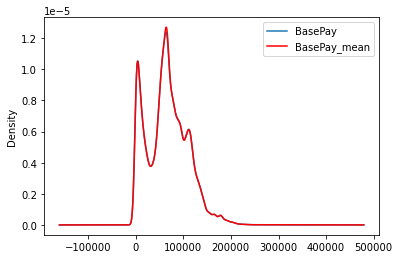

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df["BasePay"].plot(kind='kde', ax=ax)
df["BasePay_mean"].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


##### Hence, we observed that Mean/Median/Mode imputation is the best technique for handling missing values for numerical columns `Benefits` and `BasePay`.

##### We will Replace the null values on the columns `Benefits` and `BasePay` with the Mean value

In [63]:
df['BasePay'] = df['BasePay'].fillna(df['BasePay'].mean())

In [64]:
df.drop(columns = ['BasePay_mean'],inplace=True)

In [65]:
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].mean())

In [66]:
df.isnull().sum()

JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148650 non-null  object 
 1   BasePay           148650 non-null  float64
 2   OvertimePay       148650 non-null  float64
 3   OtherPay          148650 non-null  float64
 4   Benefits          148650 non-null  float64
 5   TotalPay          148650 non-null  float64
 6   TotalPayBenefits  148650 non-null  float64
 7   Year              148650 non-null  int64  
 8   BasePay_median    148650 non-null  float64
 9   Benefits_mean     148650 non-null  float64
 10  Benefits_median   148650 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 13.0+ MB


In [67]:
df.shape

(148650, 8)

In [68]:
df.describe()   # Only Numeric Columns with Aggregations

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,66325.448841,5066.059886,3648.767297,25007.893151,74770.333901,93695.075969,2012.522603
std,42677.520938,11454.380559,8056.601866,13398.592167,50516.196009,62792.497391,1.117526
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33846.057500,0.000000,0.000000,22341.452500,36169.955000,44073.337500,2012.000000
50%,65092.190000,0.000000,811.270000,25007.893151,71427.240000,92406.020000,2013.000000
75%,94609.715000,4658.175000,4236.065000,33468.980000,105842.960000,132877.992500,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


### Observations

- Mean of columns `BasePay` and `TotalPayBenefits` is slightly more than Median, which mean Data is slightly skewed towards the right 
- Mean and Median of column `Benefits` are almost same.

## Box Plot

<AxesSubplot:>

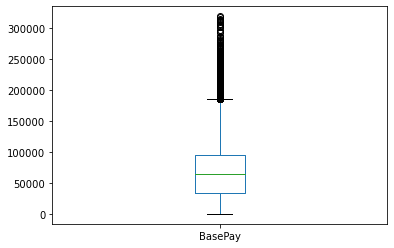

In [69]:
df["BasePay"].plot(kind="box")

<AxesSubplot:>

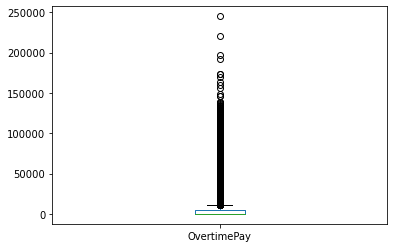

In [70]:
df["OvertimePay"].plot(kind="box")

<AxesSubplot:xlabel='TotalPay'>

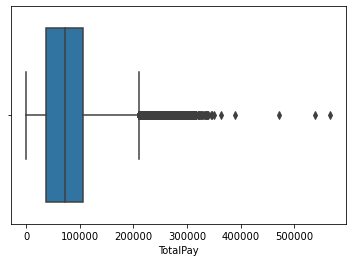

In [73]:
sns.boxplot(df['TotalPay'])

## Dist Plot

<AxesSubplot:xlabel='Benefits', ylabel='Density'>

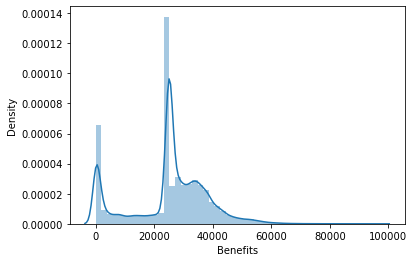

In [72]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df['Benefits'])

### Bar Plot

<AxesSubplot:xlabel='Year', ylabel='Benefits'>

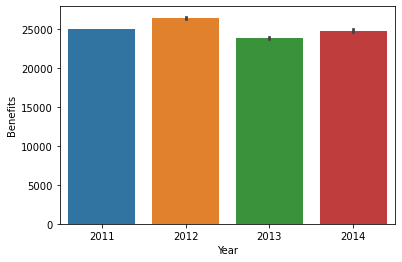

In [102]:
sns.barplot(y='Benefits',x='Year', data=df)

## Bar Plot

<AxesSubplot:xlabel='Year'>

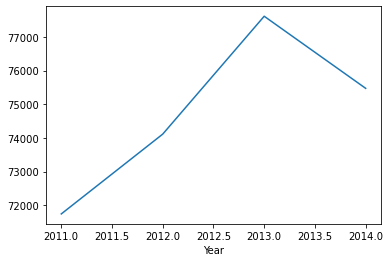

In [92]:
df.groupby('Year').mean()['TotalPay'].plot(kind='line')

<AxesSubplot:xlabel='Year'>

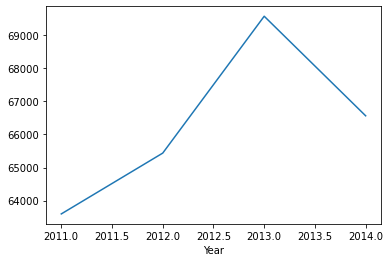

In [95]:
df.groupby('Year').mean()['BasePay'].plot(kind='line')

### Histogram Plot


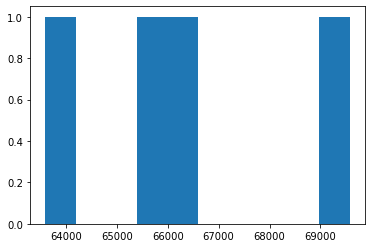

In [101]:
x = df.groupby('Year').mean()['BasePay']
plt.hist(x)
plt.show()

### Scatterplot 


<AxesSubplot:xlabel='Year', ylabel='BasePay'>

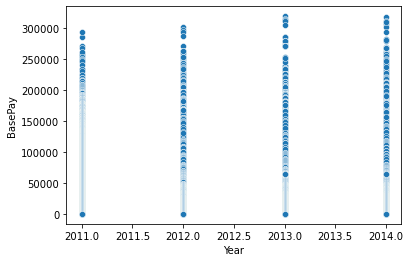

In [106]:
sns.scatterplot(x="Year", y="BasePay",data = df)

## Pair Plot

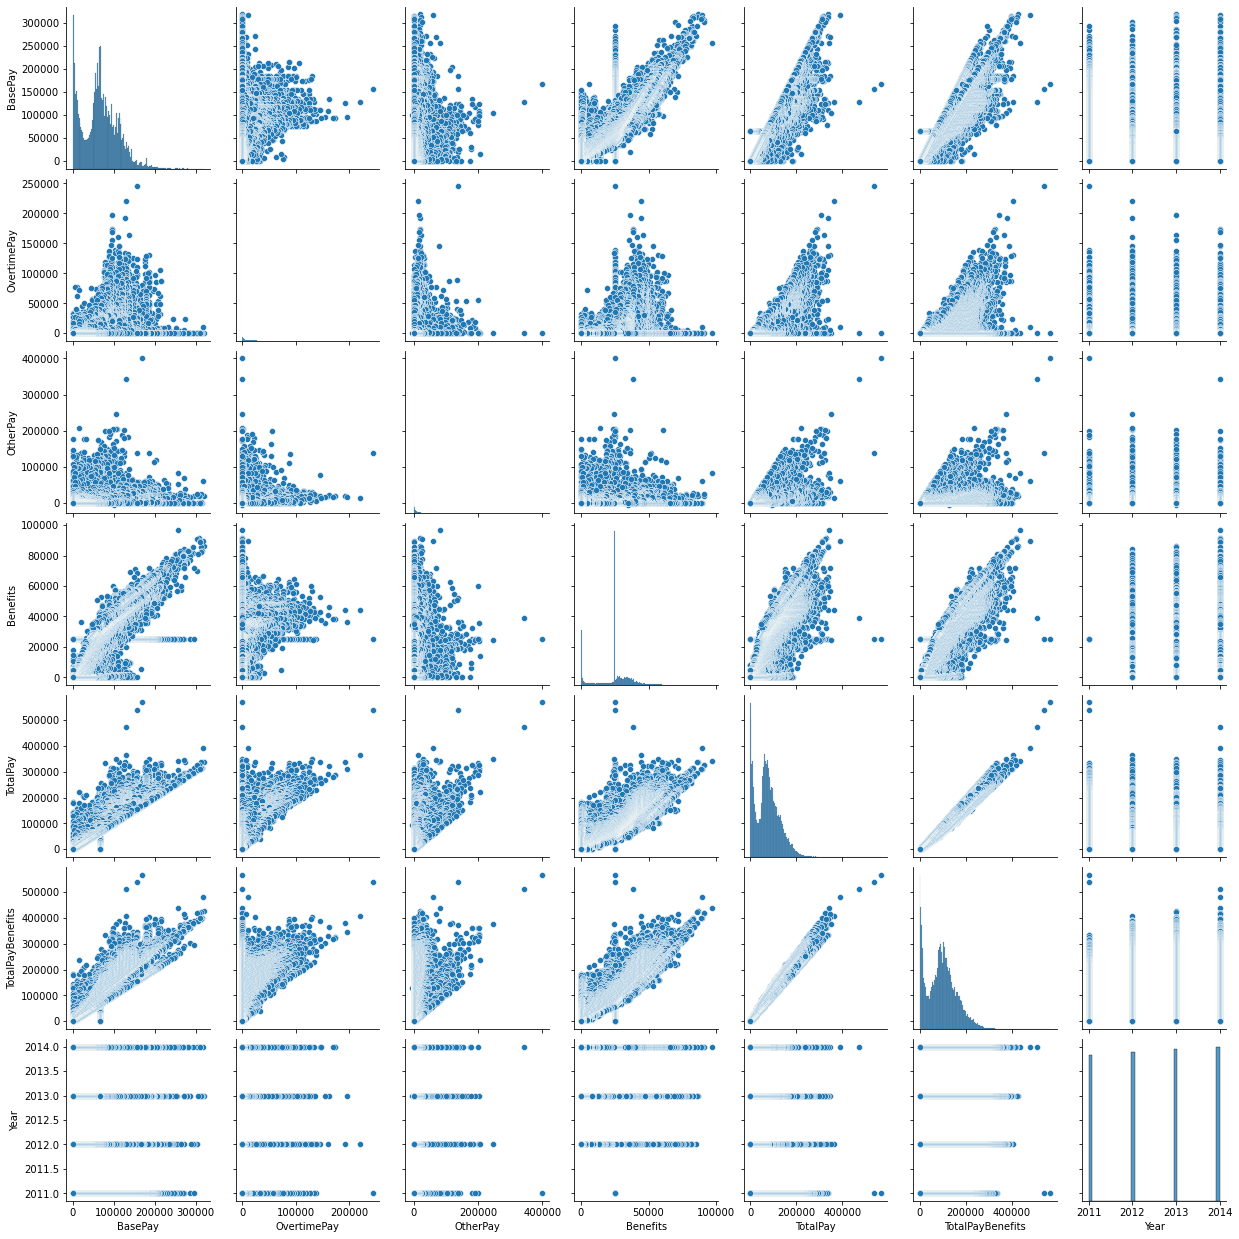

In [102]:
sns.pairplot(df)